In [1]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)

In [3]:
# cow_id vs lactation_number?
# remark, r, t, b???
columns = ['cow_id', 'lactation_number', 'calving_date', 'date_collar_on', 'date_collar_off', 'event', 'days_in_milk', 'download_date', 'remark', 'r', 't', 'b']

breedings = pd.read_csv(
    'initial data/breedings.csv',
    header=0,
    names=columns,
    converters={'calving_date': lambda x: pd.to_datetime(x, errors='coerce'), 
                'date_collar_on': lambda x: pd.to_datetime(x, errors='coerce'), 
                'date_collar_off': lambda x: pd.to_datetime(x, errors='coerce'), 
                'event': lambda x: x.strip(), 
                'download_date': lambda x: pd.to_datetime(x, errors='coerce'), 
                'remark': lambda x: x.strip(), 
                'r': lambda x: x.strip(), 
                'b': lambda x: x.strip()})

breedings = breedings.sort_values(by=['download_date'])
breedings

,cow_id,lactation_number,calving_date,date_collar_on,date_collar_off,event,days_in_milk,download_date,remark,r,t,b
8,5081,2,2018-04-12,NaT,NaT,BRED,149,2018-09-08,7H12988,O,4,F
9,5081,2,2018-04-12,NaT,NaT,BRED,172,2018-10-01,7H14456,P,7,F
5,4339,3,2018-08-20,2018-07-25,2018-09-20,BRED,92,2018-11-20,7H14429,O,7,F
6,4339,3,2018-08-20,2018-07-25,2018-09-20,BRED,118,2018-12-16,7H14429,O,4,F
0,76,2,2018-08-29,2018-08-15,2018-10-08,BRED,125,2019-01-01,7H14385,O,4,F
7,4339,3,2018-08-20,2018-07-25,2018-09-20,BRED,150,2019-01-17,7H14581,O,7,F
1,76,2,2018-08-29,2018-08-15,2018-10-08,BRED,152,2019-01-28,7LM14,O,7,F
2,76,2,2018-08-29,2018-08-15,2018-10-08,BRED,159,2019-02-04,7LM15,O,7,F
3,76,2,2018-08-29,2018-08-15,2018-10-08,BRED,181,2019-02-26,7LM12,O,7,F
4,76,2,2018-08-29,2018-08-15,2018-10-08,BRED,204,2019-03-21,7AN408,,7,F


In [4]:
# cow_id vs lactation_number?
# remark, r, t, b???
columns = ['cow_id', 'lactation_number', 'event', 'days_in_milk', 'date', 'remark', 'r', 't', 'b']

breedings = pd.read_csv(
    'initial data/breedings.csv',
    header=0,
    names=columns,
    converters={'event': lambda x: x.strip(), 
                'date': lambda x: pd.to_datetime(x, errors='coerce'), 
                'remark': lambda x: x.strip(), 
                'r': lambda x: x.strip(), 
                'b': lambda x: x.strip()})

breedings = breedings.sort_values(by=['date'])
breedings

cow_id lactation_number event  days_in_milk       date  \
5081 2 4/12/18        0                0  BRED           149 2018-09-08   
       4/12/18        0                0  BRED           172 2018-10-01   
4339 3 8/20/18  7/25/18          9/20/18  BRED            92 2018-11-20   
       8/20/18  7/25/18          9/20/18  BRED           118 2018-12-16   
76   2 8/29/18  8/15/18          10/8/18  BRED           125 2019-01-01   
4339 3 8/20/18  7/25/18          9/20/18  BRED           150 2019-01-17   
76   2 8/29/18  8/15/18          10/8/18  BRED           152 2019-01-28   
       8/29/18  8/15/18          10/8/18  BRED           159 2019-02-04   
       8/29/18  8/15/18          10/8/18  BRED           181 2019-02-26   
       8/29/18  8/15/18          10/8/18  BRED           204 2019-03-21   

                 remark  r  t  b  
5081 2 4/12/18  7H12988  O  4  F  
       4/12/18  7H14456  P  7  F  
4339 3 8/20/18  7H14429  O  7  F  
       8/20/18  7H14429  O  4  F  
76   2 8/29/18  7H14385  O  4  F  
4339 3 8/20/18  7H14581  O  7  F  
76   2 8/29/18    7LM14  O  7  F  
       8/29/18    7LM15  O  7  F  
       8/29/18    7LM12  O  7  F  
       8/29/18   7AN408     7  F

In [5]:
# data_entry = (cow_id, lactation_number, calving_date, event)

calves_dict = dict()
for index, row in breedings.iterrows():
    calving_date = row.date - pd.Timedelta(days=row.days_in_milk)
    entry = (row.cow_id, row.lactation_number, calving_date, row.event)
    info = {'days_in_milk': row.days_in_milk, 'date': row.date, 'remark': row.remark, 'r': row.r, 't': row.t, 'b': row.b}
    if entry in calves_dict:
        # this cow has already been born, update entry
        log = calves_dict[entry]
        # check for errors
        assert log[-1]['days_in_milk'] <= info['days_in_milk'] and log[-1]['date'] <= info['date']
        log.append(info)
    else:
        # calf was born 
        calves_dict[entry] = [info]

for x, y in calves_dict.items():
    print(x)
    print(y)
    print()

('0', '0', Timestamp('2018-04-12 00:00:00'), 'BRED')
[{'days_in_milk': 149, 'date': Timestamp('2018-09-08 00:00:00'), 'remark': '7H12988', 'r': 'O', 't': 4, 'b': 'F'}, {'days_in_milk': 172, 'date': Timestamp('2018-10-01 00:00:00'), 'remark': '7H14456', 'r': 'P', 't': 7, 'b': 'F'}]

('7/25/18', '9/20/18', Timestamp('2018-08-20 00:00:00'), 'BRED')
[{'days_in_milk': 92, 'date': Timestamp('2018-11-20 00:00:00'), 'remark': '7H14429', 'r': 'O', 't': 7, 'b': 'F'}, {'days_in_milk': 118, 'date': Timestamp('2018-12-16 00:00:00'), 'remark': '7H14429', 'r': 'O', 't': 4, 'b': 'F'}, {'days_in_milk': 150, 'date': Timestamp('2019-01-17 00:00:00'), 'remark': '7H14581', 'r': 'O', 't': 7, 'b': 'F'}]

('8/15/18', '10/8/18', Timestamp('2018-08-29 00:00:00'), 'BRED')
[{'days_in_milk': 125, 'date': Timestamp('2019-01-01 00:00:00'), 'remark': '7H14385', 'r': 'O', 't': 4, 'b': 'F'}, {'days_in_milk': 152, 'date': Timestamp('2019-01-28 00:00:00'), 'remark': '7LM14', 'r': 'O', 't': 7, 'b': 'F'}, {'days_in_milk': 

In [6]:
calves = pd.DataFrame(data=calves_dict.keys(), columns=['cow_id', 'lactation_number', 'calving_date', 'event'])
calves = calves.sort_values(by=['cow_id'])
calves

,cow_id,lactation_number,calving_date,event
0,0,0,2018-04-12,BRED
1,7/25/18,9/20/18,2018-08-20,BRED
2,8/15/18,10/8/18,2018-08-29,BRED


In [8]:
a = pd.read_csv('initial data/cow_a.csv')

b = pd.read_csv('initial data/cow_b.csv')
b.index += a.index[-1] + 1

c = pd.read_csv('initial data/cow_c.csv')
c.index += b.index[-1] + 1

data = pd.concat([a, b, c])

In [9]:
# ??: 'act_heat_index', 'act_heat_index_smart', 'heat_index', 'temp_dec_index', 'temp_height_index', 'temp_inc_index'
data.columns = ['act_heat_index', 'act_heat_index_smart', 'activity', 'heat_index', 'activity_1day_avg', '60percentile_of_5day_temp', 'temp', 'temp_dec_index', 'temp_height_index', 'temp_inc_index', 'temp_without_drink_cycles', 'time', 'cow_id']

data.time = pd.to_datetime(data.time, errors='coerce')
data.cow_id = pd.to_numeric(data.cow_id.str.split('.').apply(lambda x: x[0]))

data

,act_heat_index,act_heat_index_smart,activity,heat_index,activity_1day_avg,60percentile_of_5day_temp,temp,temp_dec_index,temp_height_index,temp_inc_index,temp_without_drink_cycles,time,cow_id
0,NaN,NaN,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-25 15:44:00,4339
1,NaN,NaN,18.080,NaN,11.037,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-25 15:54:00,4339
2,NaN,NaN,9.559,NaN,15.139,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-25 16:04:00,4339
3,NaN,NaN,6.359,NaN,17.190,NaN,NaN,NaN,NaN,NaN,39.37,2018-07-25 16:14:00,4339
4,NaN,NaN,4.759,NaN,16.858,NaN,NaN,NaN,NaN,NaN,39.76,2018-07-25 16:24:00,4339
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162080,NaN,NaN,8.160,NaN,4.796,39.4,NaN,NaN,0.09,0.0,39.49,2019-10-29 07:04:00,76
162081,NaN,NaN,4.160,NaN,5.895,39.4,NaN,NaN,0.09,0.0,39.49,2019-10-29 07:14:00,76
162082,NaN,NaN,2.300,NaN,6.457,39.4,NaN,NaN,0.09,0.0,39.49,2019-10-29 07:24:00,76
162083,NaN,NaN,3.000,NaN,6.816,39.4,NaN,NaN,0.03,0.0,39.43,2019-10-29 07:34:00,76


In [10]:
# it looks like there's additional rows added with missing data
# aka rows beyond the 10 minute intervals - so remove them
data = data[~data.activity_1day_avg.isnull()]

In [11]:
# NaT from first one only (no missing times)
set(data.time.diff())

{NaT,
 Timedelta('-425 days +11:41:00'),
 Timedelta('-79 days +18:29:00'),
 Timedelta('0 days 00:10:00'),
 Timedelta('0 days 01:10:00')}

In [12]:
print(len(data))
print(set(data.cow_id))

138722
{5081, 4339, 76}


In [13]:
print(data.isnull().sum() / len(data))
# heat_index, temp always empty
# activity, activity_1day_avg, time, cow_id

act_heat_index               0.443845
act_heat_index_smart         0.454960
activity                     0.000000
heat_index                   1.000000
activity_1day_avg            0.000000
60percentile_of_5day_temp    0.004686
temp                         1.000000
temp_dec_index               1.000000
temp_height_index            0.004686
temp_inc_index               0.005176
temp_without_drink_cycles    0.000043
time                         0.000000
cow_id                       0.000000
dtype: float64


In [14]:
parsed_data = data[['cow_id', 'time', 'temp_without_drink_cycles', 'activity', 'activity_1day_avg']]
# potential: 'act_heat_index', 'act_heat_index_smart'
#   '60percentile_of_5day_temp', 'temp_height_index', 'temp_inc_index'

parsed_data = parsed_data[~parsed_data.isnull().any(axis=1)]
parsed_data

,cow_id,time,temp_without_drink_cycles,activity,activity_1day_avg
3,4339,2018-07-25 16:14:00,39.37,6.359,17.190
4,4339,2018-07-25 16:24:00,39.76,4.759,16.858
5,4339,2018-07-25 16:34:00,39.76,3.959,15.985
6,4339,2018-07-25 16:44:00,39.73,4.539,17.832
7,4339,2018-07-25 16:54:00,39.73,5.669,16.000
...,...,...,...,...,...
162080,76,2019-10-29 07:04:00,39.49,8.160,4.796
162081,76,2019-10-29 07:14:00,39.49,4.160,5.895
162082,76,2019-10-29 07:24:00,39.49,2.300,6.457
162083,76,2019-10-29 07:34:00,39.43,3.000,6.816


In [15]:
cows = dict()
for cow in set(parsed_data.cow_id):
    cows[cow] = parsed_data[parsed_data.cow_id == cow]

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def plot_cow(cow_id, day=False):
    ax = plt.gca()
    
    df = cows[cow_id]
    if day:
        df[['temp_without_drink_cycles', 'activity']] = df[['temp_without_drink_cycles', 'activity']].rolling(12*6, min_periods=1).mean()

    dates = (min(df.time), max(df.time))
    df.plot(kind='line', x='time', y='temp_without_drink_cycles', ax=ax, figsize=(30, 10), xticks=np.arange(dates[0], dates[1], pd.Timedelta(days=21)))
    df.plot(kind='line', x='time', y='activity', color='red', ax=ax)
    
    for date in calves[calves.cow_id == cow_id].calving_date:
        pregnancy = (date - pd.Timedelta(days=283), date)
        if pregnancy[1] > dates[0] and pregnancy[0] < dates[1]:
            ax.axvspan(pregnancy[0], pregnancy[1], color='purple', alpha=0.25)

    plt.show()

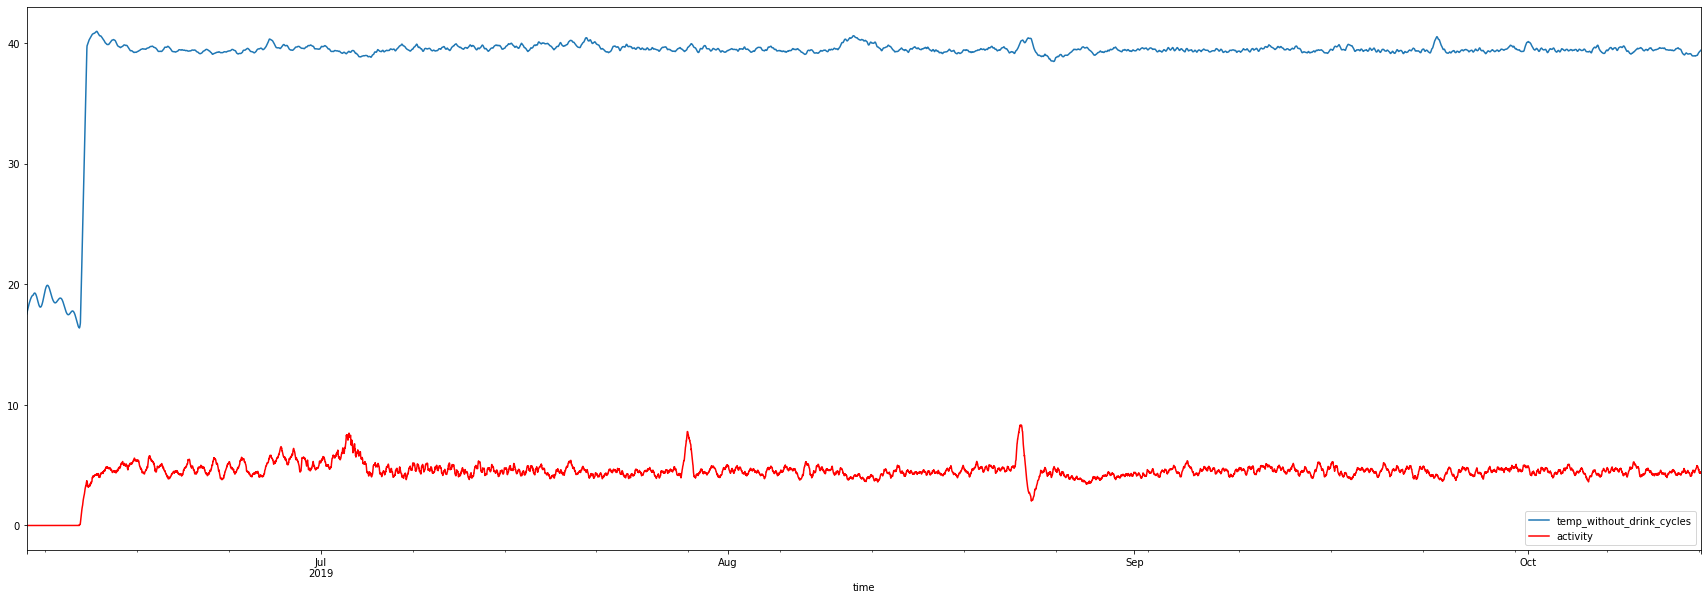

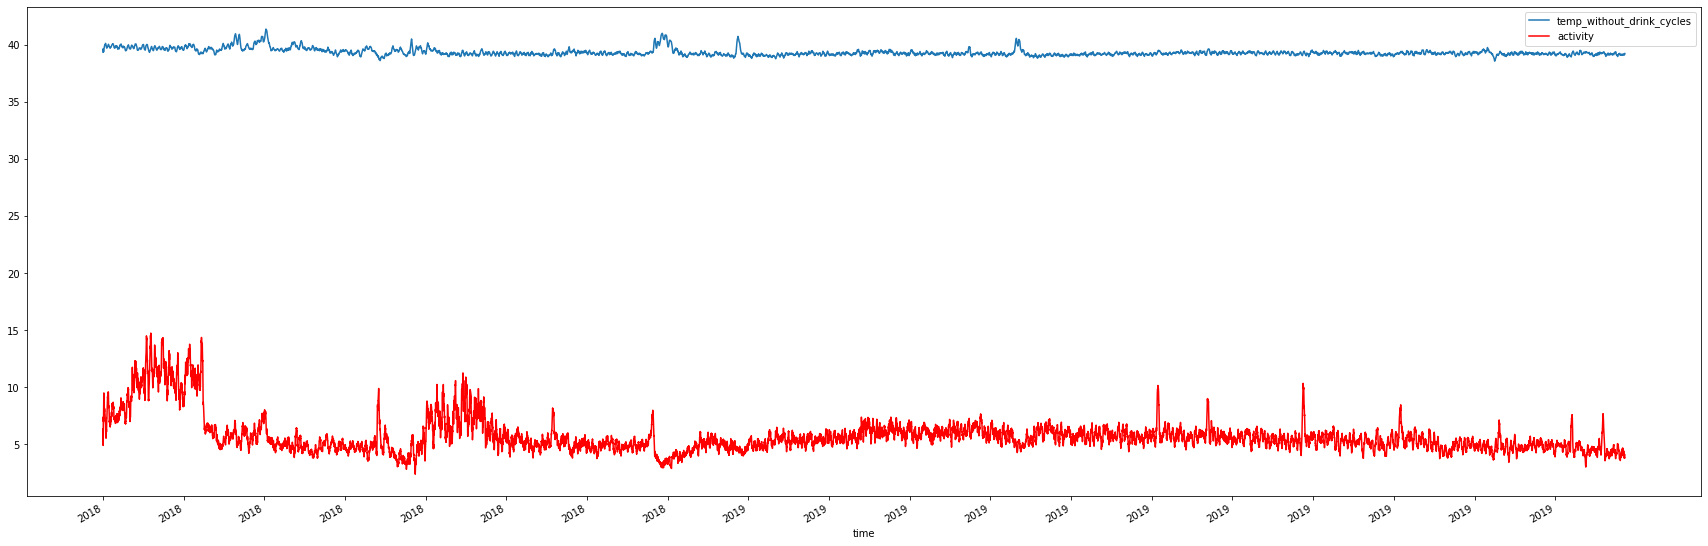

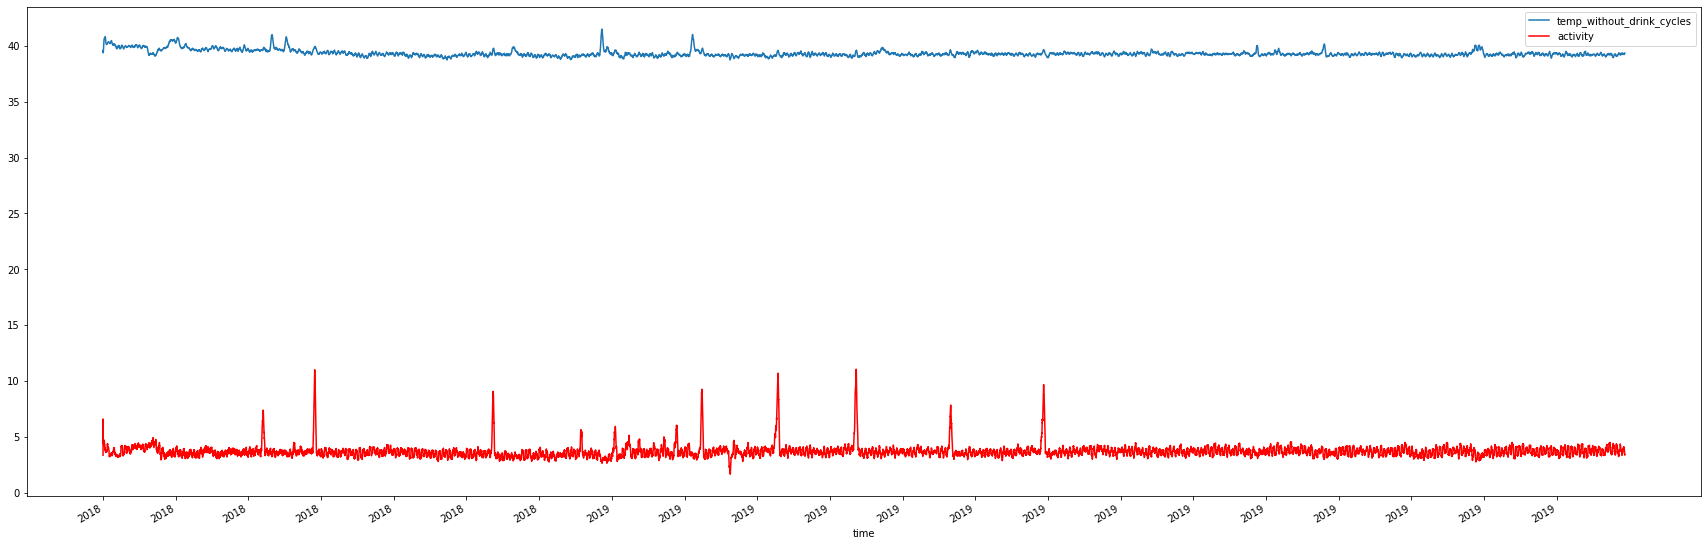

In [17]:
for cow in cows.keys():
    plot_cow(cow, day=True)